# FTSE Shares Fetcher

In [51]:
import requests
import json 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

ALPHA_VANTAGE_API_KEY = "M7QIAIPEESZG98OS"
WORLD_TRADING_API_KEY = "q9fgH5fmiTgOynjbRDqJmuLyfKI6JxUnxnoEaFXXleWhGGgEHGo5mf8LMnua"

## Utility Functions

In [3]:
def print_json(results): 
    print(json.dumps(results, indent=2))

1. Get full daily data of FTSE for specified dates

In [76]:
df = pd.read_csv("data/ftse.csv", index_col=0) 

df

,Open Price,Close Price,High Price,Low Price,Volume
Date,,,,,
27-12-2019,7632.24,7644.90,7665.40,7622.46,307085152
30-12-2019,7644.90,7587.05,7644.90,7587.05,289089056
02-01-2020,7542.44,7604.30,7624.78,7542.44,471518624
03-01-2020,7604.30,7622.40,7626.41,7551.00,433410880
06-01-2020,7622.40,7575.34,7622.40,7528.08,507945696
07-01-2020,7575.34,7573.85,7604.59,7562.14,496371744
08-01-2020,7573.85,7574.93,7579.48,7524.96,586270720
09-01-2020,7574.93,7598.12,7627.76,7574.93,610760128
10-01-2020,7598.12,7587.85,7631.96,7585.07,598582912


In [77]:
df.index= pd.to_datetime(df.index, dayfirst=True) 
df.index

DatetimeIndex(['2019-12-27', '2019-12-30', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13'],
              dtype='datetime64[n

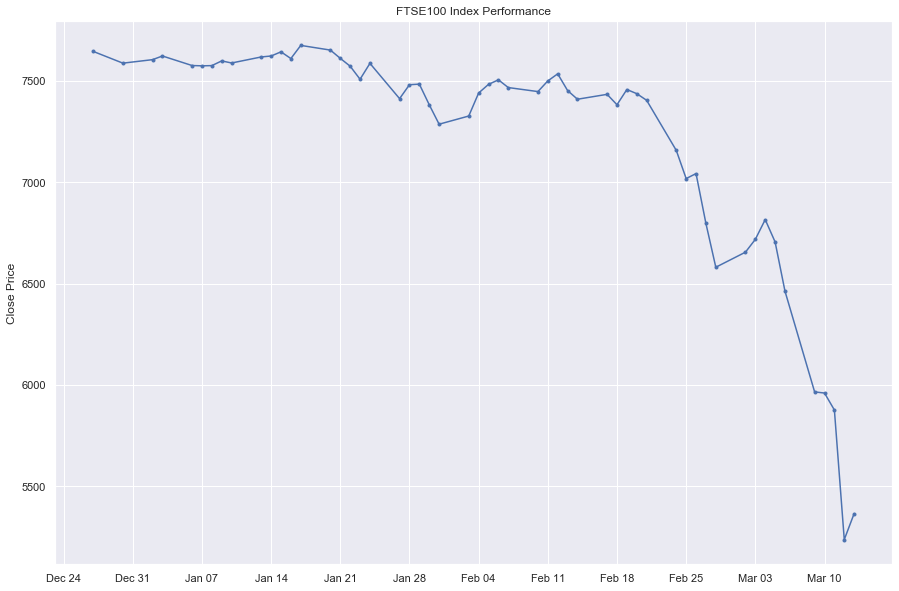

In [81]:
# sns.set(rc={'figure.figsize':(15, 10)})
# axes = df['Close Price'].plot(marker='.', linewidth=0.5)
# axes.set_ylabel('Close Price')

sns.set(rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()
ax.plot(df['Close Price'], marker='.', linestyle='-')

ax.set_title('FTSE100 Index Performance')
ax.set_ylabel('Close Price')
ax.xaxis_date()

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.TUESDAY))
# # Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
